In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# PS 02
David Gao
## 1 Cleaning Data
#### 1.1

In [2]:
gapminder = pd.read_csv(r'gapminder.csv', sep='\t')
gapminder.head(3)

,iso3,name,iso2,region,sub-region,intermediate-region,time,totalPopulation,fertilityRate,lifeExpectancy,...,accessElectricity,agriculturalLand,agricultureTractors,cerealProduction,fertilizerHa,co2,greenhouseGases,co2_PC,pm2.5_35,battleDeaths
0,ABW,Aruba,AW,Americas,Latin America and the Caribbean,Caribbean,1960.0,54211.0,4.820,65.662,...,NaN,NaN,NaN,NaN,NaN,11092.675,NaN,204.62037,NaN,NaN
1,ABW,Aruba,AW,Americas,Latin America and the Caribbean,Caribbean,1961.0,55438.0,4.655,66.074,...,NaN,20.0,NaN,NaN,NaN,11576.719,NaN,208.82281,NaN,NaN
2,ABW,Aruba,AW,Americas,Latin America and the Caribbean,Caribbean,1962.0,56225.0,4.471,66.444,...,NaN,20.0,NaN,NaN,NaN,12713.489,NaN,226.11808,NaN,NaN


#### 1.2

In [3]:
rows,columns = gapminder.shape
print("number of rows:", rows, "and number of columns:", columns)

number of rows: 13055 and number of columns: 25


The first few lines looks reasonable as each line contains one set of data with 25 variables.

#### 1.3

In [4]:
gapminder.isna().sum() # group by each variable and sum up the number of missing value for each variable.

iso3                       0
name                     240
iso2                     300
region                   241
sub-region               241
intermediate-region     7697
time                      36
totalPopulation           76
fertilityRate           1307
lifeExpectancy          1325
childMortality          2600
youthFemaleLiteracy    12134
youthMaleLiteracy      12134
adultLiteracy          12118
GDP_PC                  3585
accessElectricity       7608
agriculturalLand        1910
agricultureTractors     6947
cerealProduction        3606
fertilizerHa            4929
co2                     2658
greenhouseGases         4994
co2_PC                  2661
pm2.5_35               10727
battleDeaths           12051
dtype: int64

The table above presents each variable and its corresponding number of null values. iso3 has no missing data, and variables, such as youth female literacy, youth male literacy, adult literacy, and battle deaths, are missing more than 12000 data.

#### 1.4

In [5]:
time_missing = gapminder[gapminder.time.isna()][["name", "iso2", "totalPopulation", "time"]]
time_missing.sample(5)
# filter out the rows which have time missing, and select name, iso2, and total
# population variables.

,name,iso2,totalPopulation,time
181,Åland Islands,AX,NaN,NaN
543,French Southern Territories,TF,NaN,NaN
8180,Montserrat,MS,NaN,NaN
5297,Isle of Man,IM,NaN,NaN
4213,Guernsey,GG,NaN,NaN


#### 1.5

From samples in 1.4, as the data for total population seems to be missing at the same time, perhaps, the data for time is also missing because the data set of those countries or areas are not collected at all. 

#### 1.6

In [6]:
taiwan = gapminder[gapminder.name.str.contains("Taiwan", na = False, regex = False)]
taiwan.head(5)

,iso3,name,iso2,region,sub-region,intermediate-region,time,totalPopulation,fertilityRate,lifeExpectancy,...,accessElectricity,agriculturalLand,agricultureTractors,cerealProduction,fertilizerHa,co2,greenhouseGases,co2_PC,pm2.5_35,battleDeaths
12031,TWN,"Taiwan, Province of China",TW,Asia,Eastern Asia,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There's only one record for Taiwan, with most of variables being null. And I think this is because Taiwan did not report the data, thus values of variables are not collected.

#### 1.7

In [7]:
name_missing = gapminder[(gapminder.name.isna()) & (~gapminder.iso2.isna())]
name_missing

,iso3,name,iso2,region,sub-region,intermediate-region,time,totalPopulation,fertilityRate,lifeExpectancy,...,accessElectricity,agriculturalLand,agricultureTractors,cerealProduction,fertilizerHa,co2,greenhouseGases,co2_PC,pm2.5_35,battleDeaths


There is not such data set that has name missing while iso2 is not.

In [8]:
iso2_missing = gapminder[(~gapminder.name.isna()) & (gapminder.iso2.isna())]
iso2_missing.shape

(60, 25)

There are 60 rows that has name while missing iso2 value.

#### 1.8

In [9]:
gapminder[(gapminder.name == "Namibia") & (~gapminder.iso2.isna())].head(1)

,iso3,name,iso2,region,sub-region,intermediate-region,time,totalPopulation,fertilityRate,lifeExpectancy,...,accessElectricity,agriculturalLand,agricultureTractors,cerealProduction,fertilizerHa,co2,greenhouseGases,co2_PC,pm2.5_35,battleDeaths


The iso2 for Namibia is NA. Reference: [Namibia ISO2](http://travel.fyicenter.com/1000183_NA-Namibia.html)

#### 1.9

In [51]:
diff_countries = gapminder.iso3.unique().shape
diff_countries

(253,)

There are 253 distinct countries in the data. I use iso3 as it has not missing data.

#### 1.10

In [11]:
earliest = gapminder.time.min()
earliest

1960.0

In [12]:
recent = gapminder.time.max()
recent

2019.0

The earliest year in data is 1960, and the most recent year is 2019.

## 2 Wealth
#### 2.1

In [43]:
GDP = gapminder[~gapminder.GDP_PC.isna()]

In [46]:
recent_GDP = GDP.time.max()
recent_GDP

2019.0

The most recent GDP data is in year 2019.

#### 2.2

In [15]:
GDP_2019 = GDP[GDP.time == 2019].GDP_PC.mean()
print("The average GDP per capita across all countries in 2019 is", GDP_2019)

The average GDP per capita across all countries in 2019 is 15055.352217243239


#### 2.3

In [16]:
countries = GDP.groupby(["name"]).time.max().sort_values().head(5)
countries

name
Liechtenstein               2010.0
Faroe Islands               2010.0
Djibouti                    2010.0
Turks and Caicos Islands    2010.0
Eritrea                     2011.0
Name: time, dtype: float64

Liechtenstein, Faroe Islands, Djibouti, Turks and Caicos Islands, and Eritrea are the 5 countries have the largest number of the most recent years GPD missing.\
And the reason why data of these countries are missing is that they are really small countries and data might not be collected or unable to be collected as data is not recorded.\
The most recent years that these five countries have data are presented in the table above.

#### 2.4

In [17]:
continent = GDP[GDP.time == 2019].groupby(["region"]).GDP_PC.mean().round().sort_values(ascending = False)
continent

region
Europe      33228.0
Americas    14517.0
Asia        14116.0
Oceania     11818.0
Africa       2766.0
Name: GDP_PC, dtype: float64

The order looks reasonable, as though eruope does not have the highest total GDP, it has much smaller population than Americas and Asia, thus having the highest GDP per capita.

#### 2.5

In [18]:
continent_rp = GDP[GDP.time == 2019].groupby(["region"])
rich = continent_rp.GDP_PC.idxmax()
poor = continent_rp.GDP_PC.idxmin()

rich_countries = GDP.loc[rich.values][["name", "region", "GDP_PC", "totalPopulation"]]
rich_countries.head(5)

,name,region,GDP_PC,totalPopulation
11249,Seychelles,Africa,15048.74693,97625.0
1505,Bermuda,Americas,94106.36125,64027.0
9924,Qatar,Asia,63281.67468,2832067.0
7039,Luxembourg,Europe,111043.53170,620001.0
663,Australia,Oceania,57183.37935,25365745.0


The richest countries are Seychelles in Africa, Bermuda in Americas, Qatar in Asia, Luxembourg in Europe, and Australia in Oceania.

In [19]:
poor_countries = GDP.loc[poor.values][["name", "region", "GDP_PC", "totalPopulation"]]
poor_countries.head(5)

,name,region,GDP_PC,totalPopulation
843,Burundi,Africa,208.07473,11530580.0
5176,Haiti,Americas,1245.01250,11263077.0
119,Afghanistan,Asia,573.28755,38041754.0
12211,Ukraine,Europe,3224.93517,44386203.0
10408,Solomon Islands,Oceania,1749.42726,669823.0


The poorest countries are Furundi in Africa, Haiti in Americas, Afghanistan in Asia, Ukraine in Europe, and Solomon Islands in Oceania.

#### 2.6

In [20]:
rich_countries.index = [rich_countries.region]
rich_countries = rich_countries.rename({"name":"richest"}, axis = 1)[["richest", "GDP_PC", "totalPopulation"]]
# rich_countries.head(5)

In [21]:
poor_countries.index = [poor_countries.region]
poor_countries = poor_countries.rename({"name":"poorest"}, axis = 1)[["poorest", "GDP_PC", "totalPopulation"]]
# poor_countries.head(5)

In [22]:
combine = pd.concat((poor_countries, rich_countries), axis = 1)
combine.head(5)

,poorest,GDP_PC,totalPopulation,richest,GDP_PC,totalPopulation
region,,,,,,
Africa,Burundi,208.07473,11530580.0,Seychelles,15048.74693,97625.0
Americas,Haiti,1245.01250,11263077.0,Bermuda,94106.36125,64027.0
Asia,Afghanistan,573.28755,38041754.0,Qatar,63281.67468,2832067.0
Europe,Ukraine,3224.93517,44386203.0,Luxembourg,111043.53170,620001.0
Oceania,Solomon Islands,1749.42726,669823.0,Australia,57183.37935,25365745.0


#### 2.7

These data looks unfamiliar to me. I have never heard most of the countries in this data set, including Bermuda. And I never expected Bermuda is the riches country in Americas, as I thought it should be U.S or Canada. And I think these small country can be rich because of their low population. Though their total GDP is not high enough, but as the population is low, which means the denomenator is small, the GDP per capita can be large. 

## 3 Health
#### 3.1

In [23]:
gapminder.columns # looking for varaible name of life expectancy

Index(['iso3', 'name', 'iso2', 'region', 'sub-region', 'intermediate-region',
       'time', 'totalPopulation', 'fertilityRate', 'lifeExpectancy',
       'childMortality', 'youthFemaleLiteracy', 'youthMaleLiteracy',
       'adultLiteracy', 'GDP_PC', 'accessElectricity', 'agriculturalLand',
       'agricultureTractors', 'cerealProduction', 'fertilizerHa', 'co2',
       'greenhouseGases', 'co2_PC', 'pm2.5_35', 'battleDeaths'],
      dtype='object')

In [24]:
LE_missing = gapminder[gapminder.time == 1960].lifeExpectancy.isna().sum()
print("Data of life expectancy of", LE_missing, "countries are missing in 1960.")

Data of life expectancy of 27 countries are missing in 1960.


In [25]:
LE_missing = gapminder[gapminder.time == 2019].lifeExpectancy.isna().sum()
print("Data of life expectancy of", LE_missing, "countries are missingin 2019.")

Data of life expectancy of 19 countries are missingin 2019.


#### 3.2

In [26]:
long_LE = gapminder.lifeExpectancy.idxmax()
short_LE = gapminder.lifeExpectancy.idxmin()
long_data = gapminder.loc[long_LE][["time", "name", "lifeExpectancy"]]
long_data

time                  2012.0
name              San Marino
lifeExpectancy      85.41707
Name: 10581, dtype: object

In [27]:
short_data = gapminder.loc[short_LE][["time", "name", "lifeExpectancy"]]
short_data

time                1977.0
name              Cambodia
lifeExpectancy      18.907
Name: 6097, dtype: object

San Marino has longest life expectancy, 85.41707 years, in 2012. And Cambodia has shortest life expectancy, 18.907 years, in 1977

#### 3.3

The Cambodia-Vietnam War took place in 1977, leading to low life expectancy.

#### 3.4

In [28]:
LE_continents = gapminder.groupby(["region"])
long = LE_continents.lifeExpectancy.idxmax()
short= LE_continents.lifeExpectancy.idxmin()

long_country = gapminder.loc[long][["region", "name"]]
long_country.head(5)

,region,name
3310,Africa,Algeria
2821,Americas,Cayman Islands
4995,Asia,Hong Kong
10581,Europe,San Marino
663,Oceania,Australia


In [29]:
short_country = gapminder.loc[short][["region", "name"]]
short_country.head(5)

,region,name
10079,Africa,Rwanda
5117,Americas,Haiti
6097,Asia,Cambodia
1265,Europe,Bosnia and Herzegovina
9386,Oceania,Papua New Guinea


Algeria in Africa, Cayman Island in Americas, Hong Kong in Asia, San Marino in Europe, and Australia in Oceania have the longest life expectancy.\
Rwanda in Africa, Haiti in Americas, Cambodia in Asia, Bosnia and Herzegovina in Europe, and Papua New Guinea in Oceania have the shortest life expectancy.

#### 3.5

In [30]:
countries = gapminder[~gapminder.lifeExpectancy.isna()]
countries_first_idx = countries.groupby(["name"]).time.idxmin()
countries_first = countries.loc[countries_first_idx][["name", "time", "lifeExpectancy"]]
countries_first

,name,time,lifeExpectancy
60,Afghanistan,1960.0,32.44600
182,Albania,1960.0,62.28300
3251,Algeria,1960.0,46.14100
120,Angola,1960.0,37.52400
544,Antigua and Barbuda,1960.0,61.96800
...,...,...,...
12634,Viet Nam,1960.0,59.03900
12574,Virgin Islands (U.S.),1960.0,66.22485
12815,Yemen,1960.0,29.91900
12935,Zambia,1960.0,46.68700


#### 3.6

In [31]:
countries_last_idx = countries.groupby(["name"]).time.idxmax()
countries_last = countries.loc[countries_last_idx][["name", "time", "lifeExpectancy"]]
countries_last

,name,time,lifeExpectancy
119,Afghanistan,2019.0,64.83300
241,Albania,2019.0,78.57300
3310,Algeria,2019.0,76.88000
179,Angola,2019.0,61.14700
603,Antigua and Barbuda,2019.0,77.01600
...,...,...,...
12693,Viet Nam,2019.0,75.40000
12633,Virgin Islands (U.S.),2019.0,79.66829
12874,Yemen,2019.0,66.12500
12994,Zambia,2019.0,63.88600


#### 3.7

In [44]:
# make a copy of previous files
con_first_LE = countries_first
con_last_LE = countries_last

# change index of data to countries name
con_first_LE.index = [con_first_LE.name]
con_last_LE.index = [con_last_LE.name]

# remove countries name from data
con_first_LE = con_first_LE[["time", "lifeExpectancy"]]
con_last_LE = con_last_LE[["time", "lifeExpectancy"]]

# change variable name of life expectancy of different year
con_first_LE = con_first_LE.rename({"lifeExpectancy":"LE_0"}, axis = 1)
con_last_LE = con_last_LE.rename({"lifeExpectancy":"LE_1"}, axis = 1)

# combine two dataset
combined_LE = pd.concat((con_first_LE, con_last_LE), axis = 1)

# compute LE growth for each country and add to dataset
combined_LE["LE_growth"] = 100*((combined_LE.LE_1/combined_LE.LE_0)**(1/(2019-1960)) - 1)

In [33]:
# 10 countries with lowest life expectancy growth
combined_LE.sort_values(by = ["LE_growth"]).head(10)

,time,LE_0,time,LE_1,LE_growth
name,,,,,
Marshall Islands,1987.0,72.14146,2000.0,65.23902,-0.170314
Cayman Islands,2010.0,82.19024,2010.0,82.19024,0.000000
San Marino,2012.0,85.41707,2012.0,85.41707,0.000000
Palau,1990.0,69.06927,2005.0,69.12927,0.001472
Sint Maarten (Dutch part),2007.0,74.54390,2016.0,78.29268,0.083197
Ukraine,1960.0,68.29954,2019.0,71.82732,0.085396
Serbia,1991.0,71.48780,2019.0,75.68537,0.096755
Liechtenstein,1994.0,78.42195,2019.0,83.04146,0.097057
Seychelles,1980.0,69.59756,2019.0,73.94390,0.102726


In [34]:
# 10 countries with highest life expectancy growth
combined_LE.sort_values(by = ["LE_growth"], ascending = False).head(10)

,time,LE_0,time,LE_1,LE_growth
name,,,,,
Yemen,1960.0,29.919,2019.0,66.125,1.353232
Maldives,1960.0,37.343,2019.0,78.921,1.276385
Mali,1960.0,28.199,2019.0,59.306,1.268013
Bhutan,1960.0,34.526,2019.0,71.777,1.248151
Timor-Leste,1960.0,33.729,2019.0,69.495,1.232786
Afghanistan,1960.0,32.446,2019.0,64.833,1.180194
Nepal,1960.0,35.583,2019.0,70.778,1.172379
Gambia,1960.0,32.054,2019.0,62.050,1.125813
Liberia,1960.0,34.264,2019.0,64.104,1.067371


Some of the countries have 0 life expectancy growth rate as their value of life expectancy are approximately the same in 1960 and 2019, while they might changed somewhere in this period.

#### 3.8
The pattern I find is that the life expectancies of most of the countreis increased from 1960 to 2019, with only life expectancies of San Marino and Cayman Islands did not change, and life expectancy of Marshall Islands decreased. And Yemen las the largest growth rate.

## 4 Graphical Analysis
#### 4.1

In [38]:
# extract data for largest LE growth country
yemen = gapminder[gapminder.name == "Yemen"][["time", "lifeExpectancy"]]
# extract data for lowest LE growth country
marshall_islands = gapminder[gapminder.name == "Marshall Islands"][["time", "lifeExpectancy"]]
# extract data for Ukraine
ukraine = gapminder[gapminder.name == "Ukraine"][["time", "lifeExpectancy"]]
# other two random countries
afghanistan = gapminder[gapminder.name == "Afghanistan"][["time", "lifeExpectancy"]]
albania = gapminder[gapminder.name == "Albania"][["time", "lifeExpectancy"]]

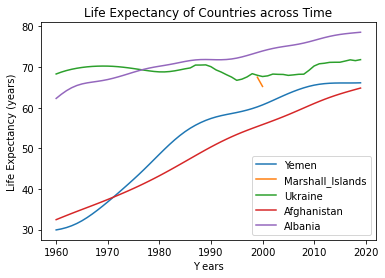

In [45]:
plt.plot(yemen.time, yemen.lifeExpectancy, label = "Yemen")
plt.plot(marshall_islands.time, marshall_islands.lifeExpectancy, label = "Marshall_Islands")
plt.plot(ukraine.time, ukraine.lifeExpectancy, label = "Ukraine")
plt.plot(afghanistan.time, afghanistan.lifeExpectancy, label = "Afghanistan")
plt.plot(albania.time, albania.lifeExpectancy, label = "Albania")

plt.title("Life Expectancy of Countries across Time")
plt.xlabel("Y ears") # I left a space between "Y" and "e", as two letters will stick together otherwise
plt.ylabel("Life Expectancy (years)")
plt.legend()
plt.show()

From the plot, Yemen and Afghanistan both have life expectancy growth in a large scale. And the life expectancy of Ukraine and Albania did not grow much. The life expectancy of Marshall Islands decreased.\
\
Reference: [Plot](https://www.delftstack.com/howto/matplotlib/plot-multiple-lines-matplotlib/)

I spend approximately 5 hours on this problem set.